In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

imgL = cv.imread('./1/2021-12-03_00-20_2.png')
imgR = cv.imread('./1/2021-12-03_00-21.png')

imgL = cv.cvtColor(imgL, cv.COLOR_BGR2RGB)
imgR = cv.cvtColor(imgR, cv.COLOR_BGR2RGB)


In [23]:
from scipy import ndimage

rotatedR = ndimage.rotate(imgR, 90)
rotatedL = ndimage.rotate(imgL, 90)




In [57]:

img1 = rotatedL[300:1100, 0:1000]
img2 = rotatedR[309:1109, 0:1000]

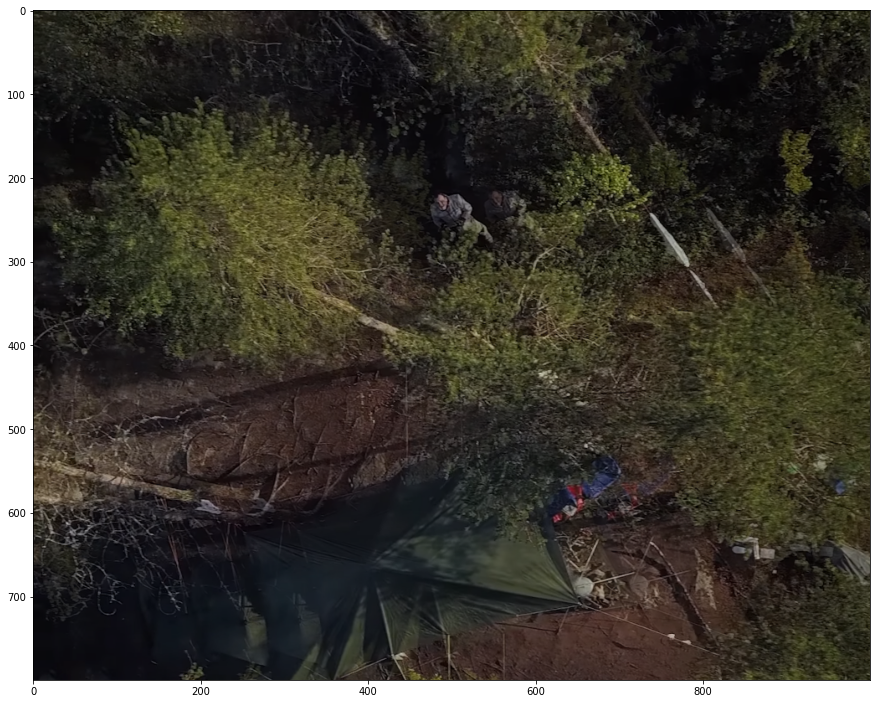

In [70]:
plt.figure(figsize=(15, 15))

plt.imshow(img1)
plt.imshow(img2, alpha=0.3)


plt.show()

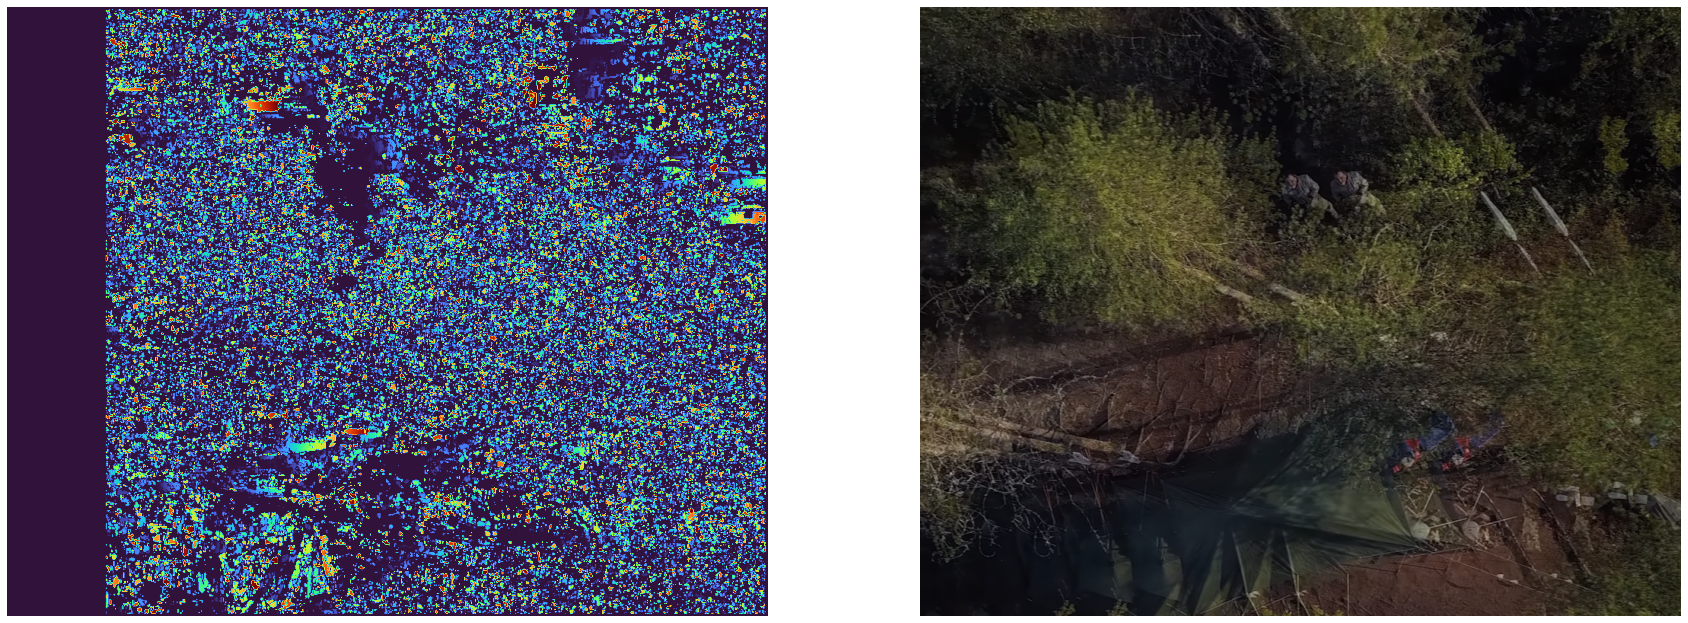

In [63]:

frame1_new = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
frame2_new = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

stereo = cv.StereoBM_create(numDisparities=128, blockSize=7)
disparity = stereo.compute(frame1_new, frame2_new)
plt.figure(figsize=(30, 15))

ax = plt.subplot(121)
ax.imshow(disparity, cmap='turbo')
ax.axis('off')

ax = plt.subplot(122)
ax.imshow(img1)
ax.imshow(img2, alpha=0.5)
ax.axis('off')
plt.show()

computing disparity...


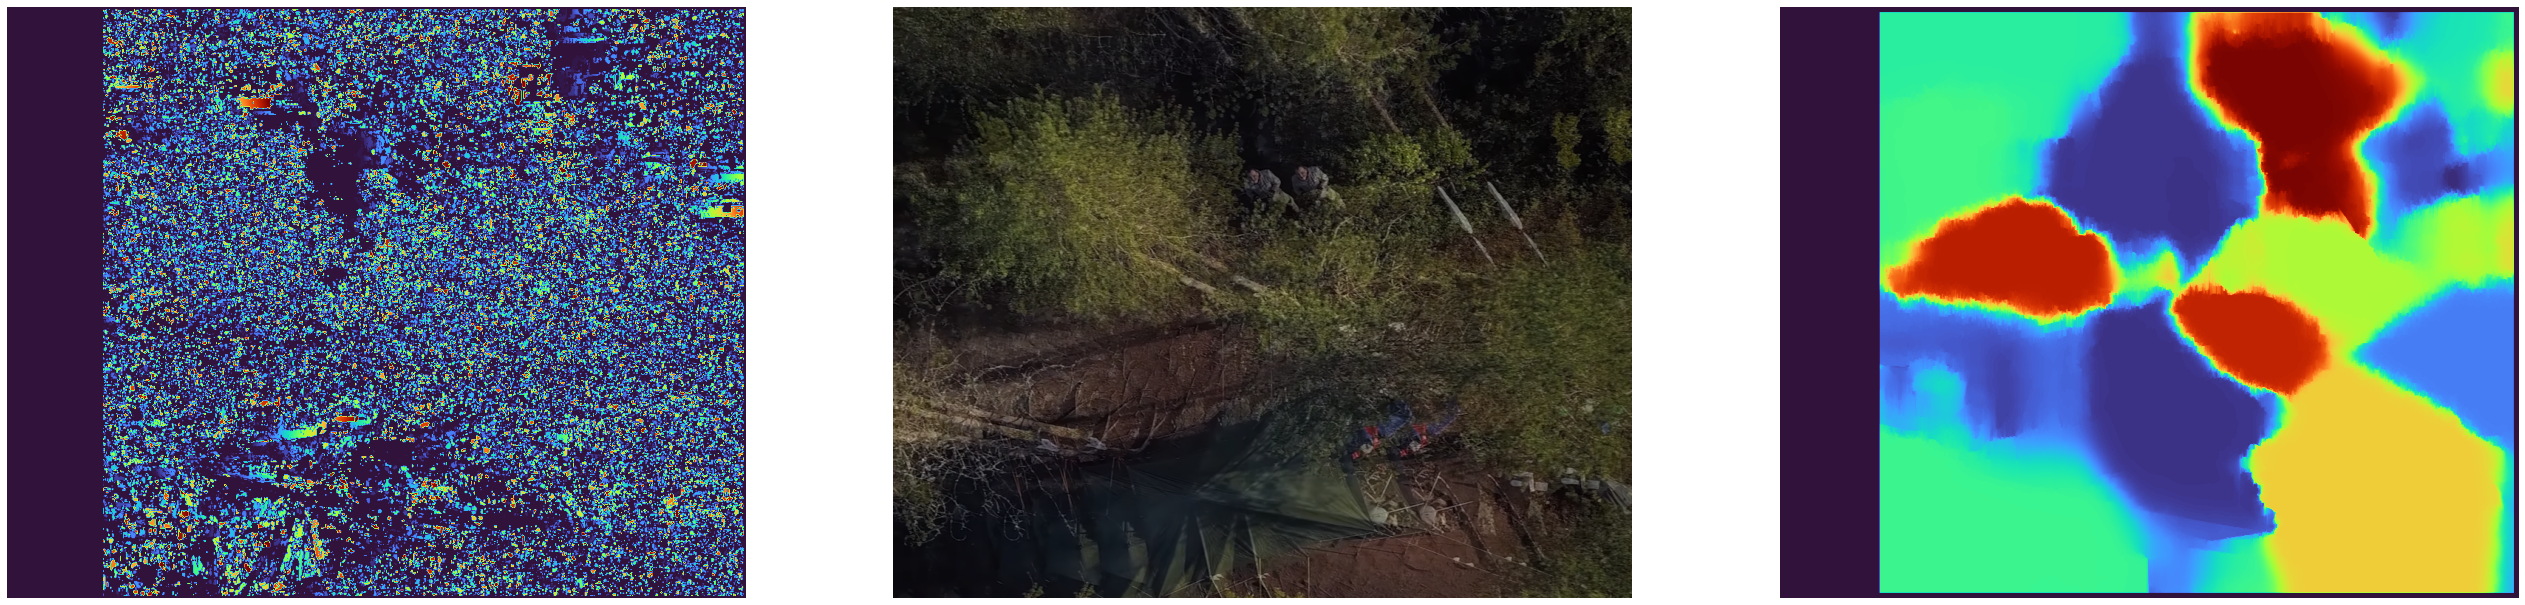

In [66]:
window_size = 3  # wsize default 3; 5; 7 for SGBM reduced size image; 15 for SGBM full size image (1300px and above); 5 Works nicely

left_matcher = cv.StereoBM_create(
    numDisparities=128,  # max_disp has to be dividable by 16 f. E. HH 192, 256
    blockSize=15,
)

right_matcher = cv.ximgproc.createRightMatcher(left_matcher)

# FILTER Parameters
visual_multiplier = 1.0
lmbda = 1000
sigma = 10

wls_filter = cv.ximgproc.createDisparityWLSFilter(matcher_left=left_matcher)
wls_filter.setLambda(lmbda)
wls_filter.setSigmaColor(sigma)

print('computing disparity...')
displ = left_matcher.compute(frame1_new, frame2_new)  # .astype(np.float32)/16
dispr = right_matcher.compute(frame2_new, frame1_new)  # .astype(np.float32)/16
displ = np.int16(displ)
dispr = np.int16(dispr)
filteredImg = wls_filter.filter(displ, frame1_new, None, dispr)  # important to put "imgL" here!!!

filteredImg = cv.normalize(src=filteredImg, dst=filteredImg, beta=0, alpha=255, norm_type=cv.NORM_MINMAX);
filteredImg = np.uint8(filteredImg)

plt.figure(figsize=(45, 15))

ax = plt.subplot(131)
ax.imshow(disparity, cmap='turbo')
ax.axis('off')

ax = plt.subplot(132)
ax.imshow(img1)
ax.imshow(img2, alpha=0.5)
ax.axis('off')

ax = plt.subplot(133)
ax.imshow(filteredImg, cmap='turbo')
ax.axis('off')

plt.show()

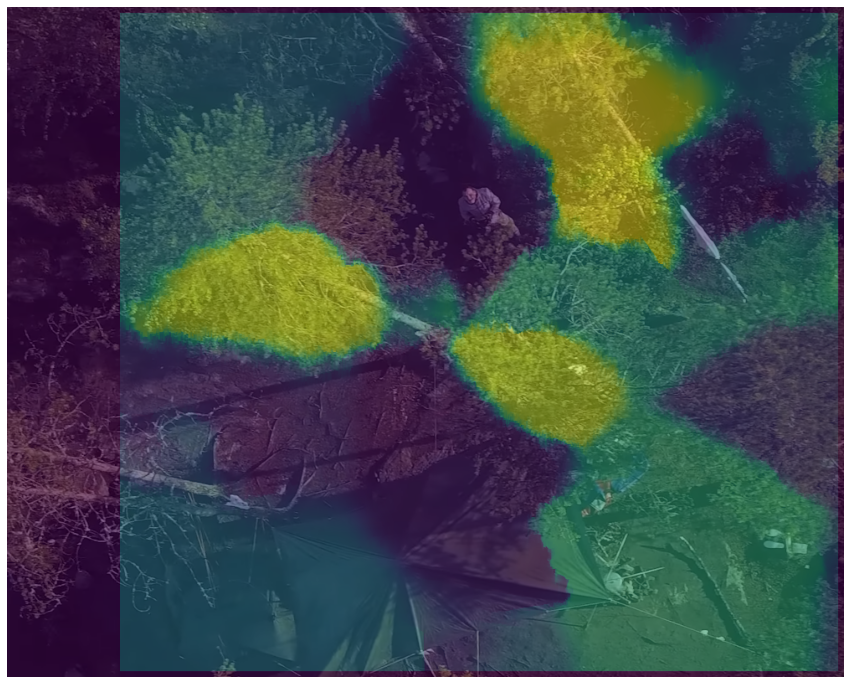

In [68]:
plt.figure(figsize=(15, 15))


plt.imshow(img2)
plt.imshow(filteredImg, alpha=0.5)
plt.axis('off')



plt.show()